In [232]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [233]:
df=pd.Series(['manager','juniorDeveloper','juniorDeveloper','seniorDeveloper','manager','seniorDeveloper','manager','seniorDeveloper','manager','juniorDeveloper','juniorDeveloper','seniorDeveloper','manager','juniorDeveloper','juniorDeveloper','seniorDeveloper','manager','juniorDeveloper','seniorDeveloper','seniorDeveloper','manager'])

In [234]:
from sklearn.preprocessing import LabelEncoder
data = ['Red', 'Green', 'Blue', 'Red','Green','Green']
le = LabelEncoder()
encoded_data = le.fit_transform(data)
print(f"Encoded Data: {encoded_data}")

Encoded Data: [2 1 0 2 1 1]


In [235]:
from sklearn.preprocessing import LabelEncoder
encoder_emp=LabelEncoder().fit_transform(df)
print(encoder_emp)
df.unique()

[1 0 0 2 1 2 1 2 1 0 0 2 1 0 0 2 1 0 2 2 1]


array(['manager', 'juniorDeveloper', 'seniorDeveloper'], dtype=object)

In [236]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
data = pd.DataFrame(['yes','no','yes','yes'], columns=['loan_status'])
encoder = OneHotEncoder(sparse_output=False)
encoded = encoder.fit_transform(data)
print(encoded)
print("Categories:", encoder.categories_)

[[0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]]
Categories: [array(['no', 'yes'], dtype=object)]


In [237]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [238]:
path='/content/drive/My Drive/Colab Notebooks/loan_approved.csv'
loan=pd.read_csv(path)

In [239]:
loan.isnull().sum()
loan

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status (Approved)
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [240]:
loan.head()
loan.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status (Approved)
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [241]:
loan['Gender']=loan['Gender'].fillna(loan['Gender'].mode()[0])
loan['Married']=loan['Married'].fillna(loan['Married'].mode()[0])
loan['Dependents']=loan['Dependents'].fillna(loan['Dependents'].mode()[0])
loan['Self_Employed']=loan['Self_Employed'].fillna(loan['Self_Employed'].mode()[0])
loan['LoanAmount']=loan['LoanAmount'].fillna(loan['LoanAmount'].median())
loan['Loan_Amount_Term']=loan['Loan_Amount_Term'].fillna(loan['Loan_Amount_Term'].mode()[0])
loan['Credit_History']=loan['Credit_History'].fillna(loan['Credit_History'].mode()[0])

In [242]:
print(len(loan['LoanAmount'].unique()))
print(len(loan['Loan_Amount_Term'].unique()))
print(len(loan['Credit_History'].unique()))
print(len(loan['CoapplicantIncome'].unique()))
print(len(loan['ApplicantIncome'].unique()))

203
10
2
287
505


In [243]:
print(loan.info())
print(loan.duplicated())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Loan_ID                 614 non-null    object 
 1   Gender                  614 non-null    object 
 2   Married                 614 non-null    object 
 3   Dependents              614 non-null    object 
 4   Education               614 non-null    object 
 5   Self_Employed           614 non-null    object 
 6   ApplicantIncome         614 non-null    int64  
 7   CoapplicantIncome       614 non-null    float64
 8   LoanAmount              614 non-null    float64
 9   Loan_Amount_Term        614 non-null    float64
 10  Credit_History          614 non-null    float64
 11  Property_Area           614 non-null    object 
 12  Loan_Status (Approved)  614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
None
0      False
1      False
2     

In [244]:
pd.get_dummies(loan,columns=['Married'],drop_first=True)

,Loan_ID,Gender,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status (Approved),Married_Yes
0,LP001002,Male,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,False
1,LP001003,Male,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,True
2,LP001005,Male,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,True
3,LP001006,Male,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,True
4,LP001008,Male,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,False
610,LP002979,Male,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,True
611,LP002983,Male,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,True
612,LP002984,Male,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,True


In [245]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
encode_dep=LabelEncoder().fit_transform(loan['Dependents'])
encode_gen=pd.get_dummies(loan['Gender'],columns=['gender'],drop_first=True)
encode_edu=pd.get_dummies(loan['Education'],columns=['edu'],drop_first=True)
loan['dependents_count']=encode_dep
loan['gender_male']=encode_gen
loan['education_Not_Graduated']=encode_edu

loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status (Approved),dependents_count,gender_male,education_Not_Graduated
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,0,True,False
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,1,True,False
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,0,True,False
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,0,True,True
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,0,True,False


In [246]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd
loan['encode_dependents'] = LabelEncoder().fit_transform(loan['Dependents'])
encode_gen = pd.get_dummies(loan['Gender'], prefix='Gender', drop_first=True)
encode_edu = pd.get_dummies(loan['Education'], prefix='Education', drop_first=True)
loan = pd.concat([loan, encode_gen, encode_edu], axis=1)
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status (Approved),dependents_count,gender_male,education_Not_Graduated,encode_dependents,Gender_Male,Education_Not Graduate
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,0,True,False,0,True,False
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,1,True,False,1,True,False
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,0,True,False,0,True,False
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,0,True,True,0,True,True
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,0,True,False,0,True,False


In [247]:
print(loan['Loan_Amount_Term'].unique())

[360. 120. 240. 180.  60. 300. 480.  36.  84.  12.]


In [248]:
m=loan['ApplicantIncome'].mean()
s=loan['ApplicantIncome'].std()
loan['zscore_app_income']=(loan['ApplicantIncome']-m)/s

In [249]:
loan['zscore_app_income'].max(),loan['zscore_app_income'].min()

(12.374533479765521, -0.8599481824249576)

7.491531216657306
84.95638421103374


<Axes: xlabel='CoapplicantIncome', ylabel='Count'>

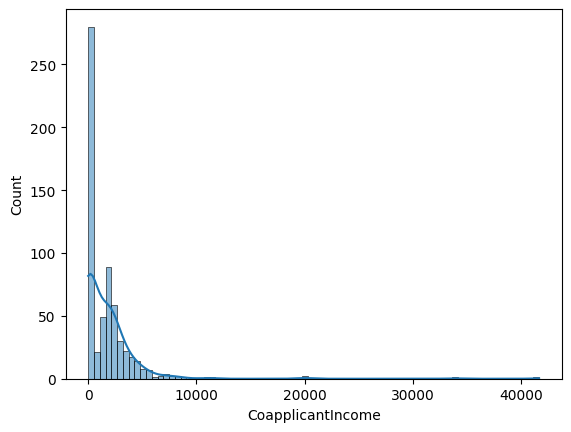

In [250]:
print(loan['CoapplicantIncome'].skew())
print(loan['CoapplicantIncome'].kurtosis())
import seaborn as sns
sns.histplot(loan['CoapplicantIncome'], kde=True)   # histogram + smooth normal curve


In [251]:
from sklearn.preprocessing import PowerTransformer
trans=PowerTransformer(method='yeo-johnson')

In [252]:
la_trans=trans.fit_transform(loan[['CoapplicantIncome']])
la_trans.shape

(614, 1)

In [253]:
print('skewness: ',pd.Series(la_trans.reshape(614,)).skew())
print('kurtosis : ',pd.Series(la_trans.reshape(614,)).kurtosis())

skewness:  -0.14564645710551902
kurtosis :  -1.8778432766544493


/tmp/ipython-input-3557985148.py:5: RuntimeWarning: invalid value encountered in log
  la_log = np.log(la_trans + 1)  # add 1 to avoid log(0)


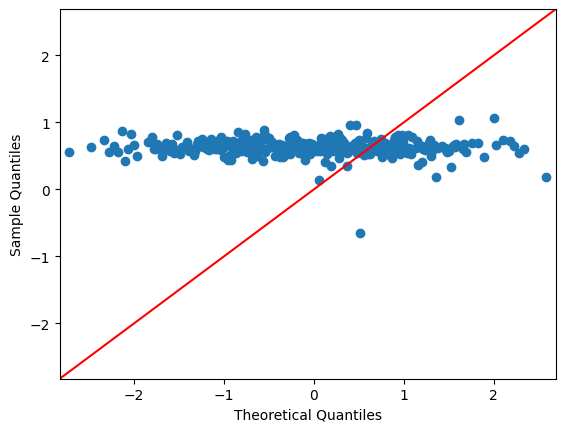

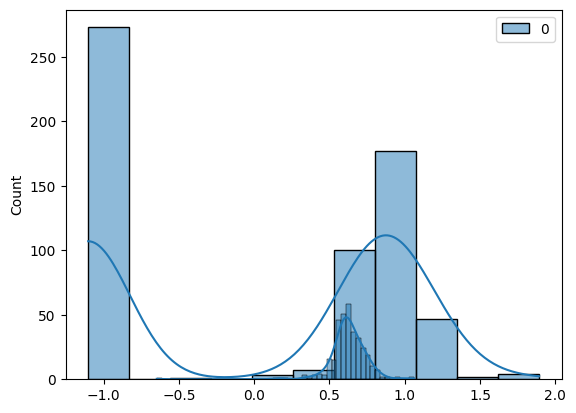

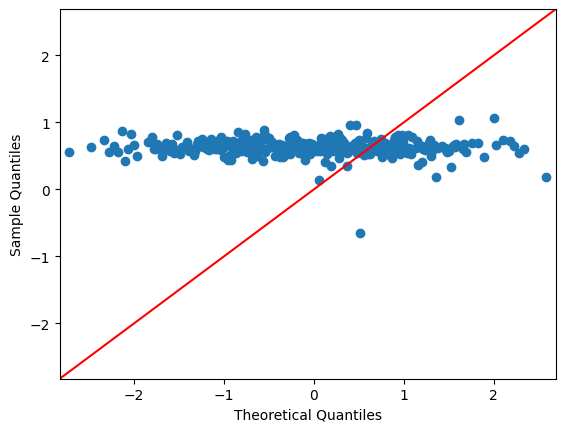

In [258]:
import seaborn as sns
import statsmodels.api as sm
sns.histplot(la_trans, kde=True)   # histogram + smooth normal curve
import numpy as np
la_log = np.log(la_trans + 1)  # add 1 to avoid log(0)
sns.histplot(la_log, kde=True)
sm.qqplot(la_log, line='45')
